In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
import os

## Local Energy Definition
The local energy represents areas containing significant changes or variations in image properties. These changes are particularly prominent at edges and regions with rapid gradients2. Unlike global energy measures, local energy focuses on neighborhood-based variations, making it especially useful for feature detection and image analysis.

### Local Energy 1D
for 1D signals using a quadrature pair of filters (even-symmetric and odd-symmetric) and identify the local maxima in the energy, which correspond to feature points.

### Python Code Example: Local Energy for 1D Signal


Here are examples of different **even** and **odd** filters that can be used to compute **local energy** in 1D. These filters are tailored for different feature types and scenarios:

---

### 1. **Gaussian-Modulated Cosine and Sine**
These are commonly used for detecting features with smooth transitions.

- **Even Filter**: \( G(x) \cdot \cos(2 \pi fx) \)
- **Odd Filter**: \( G(x) \cdot \sin(2 \pi fx) \)

```python


In [2]:
def gaussian_cosine(size, sigma, frequency):
    x = np.linspace(-size // 2, size // 2, size)
    return np.cos(2 * np.pi * frequency * x) * np.exp(-x**2 / (2 * sigma**2))

def gaussian_sine(size, sigma, frequency):
    x = np.linspace(-size // 2, size // 2, size)
    return np.sin(2 * np.pi * frequency * x) * np.exp(-x**2 / (2 * sigma**2))


## 2. **Difference of Gaussians (DoG)**
DoG filters approximate the Laplacian of Gaussian (LoG) and are effective for edge detection.

- **Even Filter**: \( G_{\text{large}}(x) - G_{\text{small}}(x) \)
- **Odd Filter**: Derivative of \( \text{DoG} \).




In [3]:
def difference_of_gaussians(size, sigma1, sigma2):
    x = np.linspace(-size // 2, size // 2, size)
    g1 = np.exp(-x**2 / (2 * sigma1**2))
    g2 = np.exp(-x**2 / (2 * sigma2**2))
    even = g1 - g2  # Difference of Gaussians
    odd = -x * even  # Derivative of DoG
    return even, odd


## 3. **Haar-Like Filters**
Haar filters are step-like and useful for detecting sharp transitions or step edges.

- **Even Filter**: A rectangular pulse.
- **Odd Filter**: A step change at the center.

```python


In [4]:
def haar_filters(size):
    even = np.ones(size)
    even[:size // 2] = -1  # Symmetric step
    odd = np.zeros(size)
    odd[:size // 2] = -1  # Asymmetric step
    odd[size // 2:] = 1
    return even, odd


## 4. **Spline-Based Filters**
Smooth polynomial filters, such as cubic splines, can be designed for specific feature types.

- **Even Filter**: Cubic spline (symmetric).
- **Odd Filter**: Derivative of the spline.




In [5]:
def spline_filters(size):
    x = np.linspace(-size // 2, size // 2, size)
    even = (1 - x**2 / (size // 2)**2)**3  # Example spline
    odd = -x * even  # Derivative of spline
    return even, odd


## 5. **Custom Gabor-Like Filters**
Gabor filters are flexible and can be adjusted for various scales and frequencies.

- **Even Filter**: Gaussian-modulated cosine.
- **Odd Filter**: Gaussian-modulated sine.

```python


In [6]:
def gabor_filters(size, sigma, frequency):
    x = np.linspace(-size // 2, size // 2, size)
    even = np.exp(-x**2 / (2 * sigma**2)) * np.cos(2 * np.pi * frequency * x)
    odd = np.exp(-x**2 / (2 * sigma**2)) * np.sin(2 * np.pi * frequency * x)
    return even, odd


## Example: Visualizing Filters


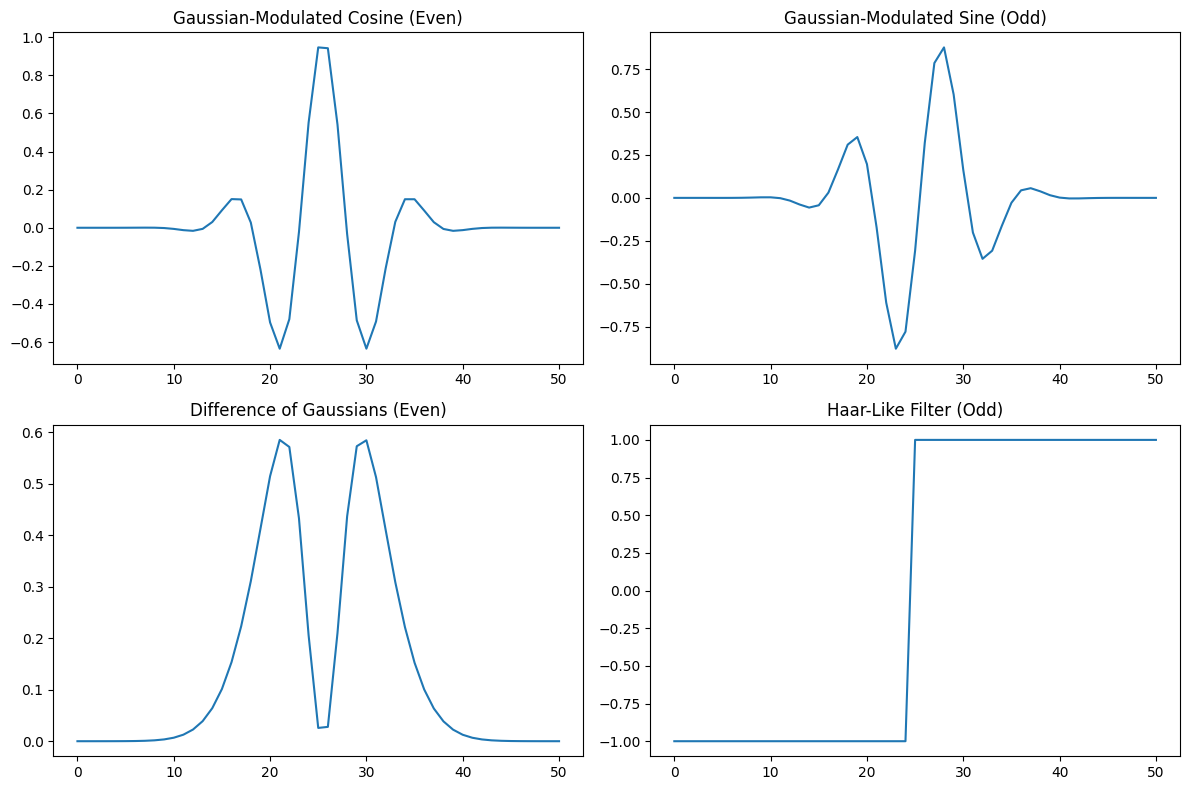

In [7]:
# Parameters
size = 51
sigma = 5
frequency = 0.1

# Generate filters
even_cosine = gaussian_cosine(size, sigma, frequency)
odd_sine = gaussian_sine(size, sigma, frequency)
even_dog, odd_dog = difference_of_gaussians(size, 5, 2)
haar_even, haar_odd = haar_filters(size)

# Plot filters
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title("Gaussian-Modulated Cosine (Even)")
plt.plot(even_cosine)

plt.subplot(2, 2, 2)
plt.title("Gaussian-Modulated Sine (Odd)")
plt.plot(odd_sine)

plt.subplot(2, 2, 3)
plt.title("Difference of Gaussians (Even)")
plt.plot(even_dog)

plt.subplot(2, 2, 4)
plt.title("Haar-Like Filter (Odd)")
plt.plot(haar_odd)

plt.tight_layout()
plt.show()


## Summary of Filters and Use Cases

| **Filter Type**       | **Even Filter**                 | **Odd Filter**                   | **Use Case**                     |
|------------------------|---------------------------------|-----------------------------------|-----------------------------------|
| Gaussian Cosine/Sine   | Smooth cosine                  | Smooth sine                      | General feature detection         |
| Difference of Gaussians| Wide Gaussian minus narrow     | Derivative of DoG                | Edge and transition detection     |
| Haar                  | Step pulse                     | Asymmetric step                  | Step edges, sharp changes         |
| Spline                | Smooth polynomial              | Derivative of spline             | Noise-robust, smooth transitions  |
| Gabor                 | Gaussian-modulated cosine      | Gaussian-modulated sine          | Multi-scale and multi-frequency   |

Each pair can be tailored to specific types of features or noise levels in the signal. Let me know if you want an example applied to a real signal!

In [8]:


file_geo = "C:\\Users\\novalis\\OneDrive\\datasa\\geoframe\\geoframe_raw.npy"

if os.path.exists(file_geo):
	geo = np.load(file_geo)
else:
	print(f"File not found: {file_geo}")
	

In [9]:
file_geo_detect="C:\\Users\\novalis\\OneDrive\\datasa\\geoframe\\geoframe_demo_detectII.dat"
if os.path.exists(file_geo_detect):
    geo_detect = np.fromfile(file_geo_detect, dtype=np.float32)
    geo_detect = geo_detect.reshape(geo.shape[0], geo.shape[1], geo.shape[2])

(876, 271)


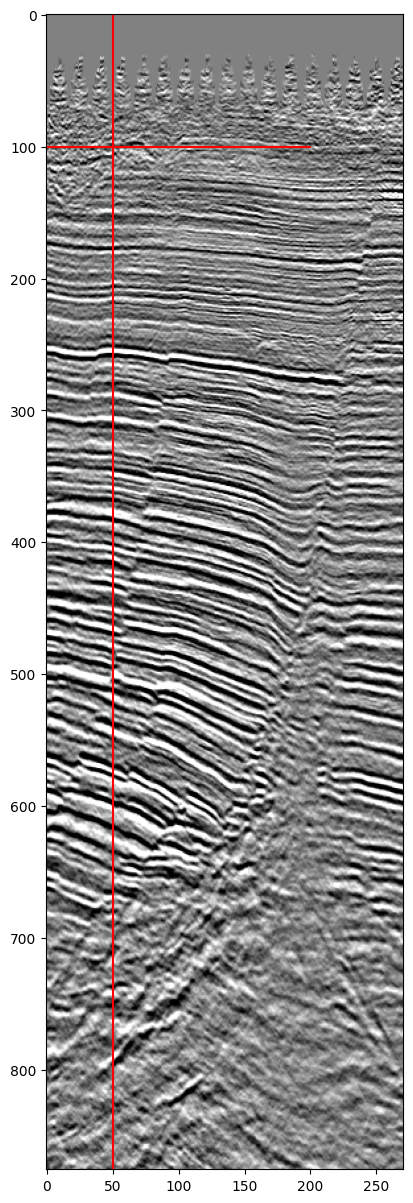

In [10]:
#figure size
img= geo[:,200,:].T
print(img.shape)
plt.figure(figsize=(10,15))
plt.imshow(img,cmap='gray')
#plot a line on the image
plt.plot([0, 200], [100, 100], 'r')
#plot vertical line
plt.plot([50, 50], [0, 875], 'r')
plt.show()

tr=img[50,:]

(876,)


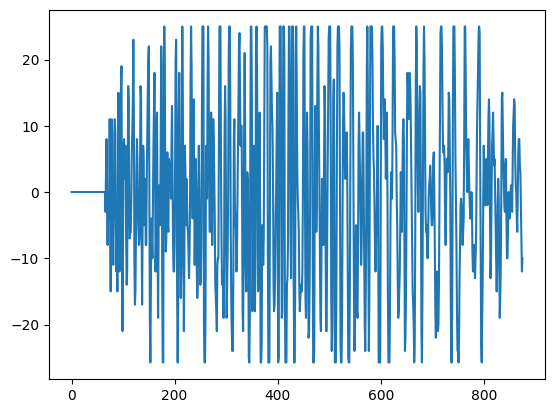

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Generate a sample 1D signal
#x = np.linspace(-10, 10, 500)
#signal = np.exp(-x**2) * np.sin(5 * x)  # A Gaussian-modulated sine wave
signal=geo[50,200,:].T
print(signal.shape)
x=np.float32(range(len(signal)))
# Define the quadrature filters (even-symmetric and odd-symmetric)
plt.plot(x,signal)

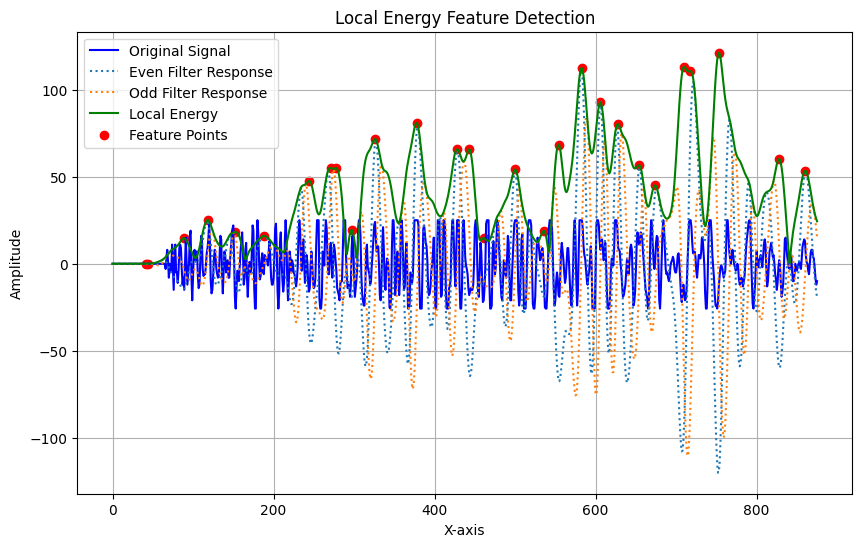

In [12]:
def even_filter(size, sigma):
    """Even-symmetric filter: cosine-like."""
    x = np.linspace(-size // 2, size // 2, size)
    return np.cos(2 * np.pi * x / size) * np.exp(-x**2 / (2 * sigma**2))

def odd_filter(size, sigma):
    """Odd-symmetric filter: sine-like."""
    x = np.linspace(-size // 2, size // 2, size)
    return np.sin(2 * np.pi * x / size) * np.exp(-x**2 / (2 * sigma**2))

# Filter parameters
filter_size = 51
sigma = 8
even = even_filter(filter_size, sigma)
odd = odd_filter(filter_size, sigma)

# Convolve the signal with the filters
even_response = convolve(signal, even, mode='same')
odd_response = convolve(signal, odd, mode='same')

# Compute the local energy
local_energy = np.sqrt(even_response**2 + odd_response**2)

# Find local maxima in local energy
from scipy.signal import find_peaks
peaks, _ = find_peaks(local_energy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, signal, label="Original Signal", color="blue")
plt.plot(x, even_response, label="Even Filter Response", linestyle='dotted')
plt.plot(x, odd_response, label="Odd Filter Response", linestyle='dotted')
plt.plot(x, local_energy, label="Local Energy", color="green")
plt.scatter(x[peaks], local_energy[peaks], color="red", label="Feature Points")
plt.legend()
plt.title("Local Energy Feature Detection")
plt.xlabel("X-axis")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


In [17]:
print(peaks.shape) 

(28,)


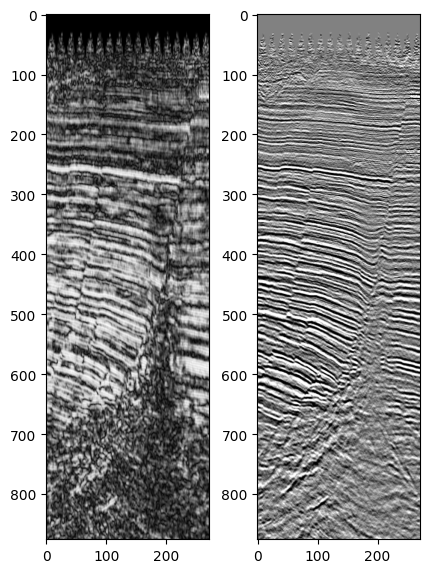

In [13]:
#apply to all signal from the image
#img=np.zeros(geo.shape[0],geo.shape[2])
# Filter parameters
filter_size = 10
sigma = 2
even = even_filter(filter_size, sigma)
odd = odd_filter(filter_size, sigma)
img0=geo[:,200,:].T
imgre=[]
for i in range(geo.shape[0]):
    signal=geo[i,200,:]
    even_response = convolve(signal, even, mode='same')
    odd_response = convolve(signal, odd, mode='same')
    local_energy = np.sqrt(even_response**2 + odd_response**2)
    imgre.append(local_energy)
    # img[i,:]=local_energy
    # peaks, _ = find_peaks(local_energy)

# Define the quadrature filters (even-symmetric and odd-symmetric)
imgre=np.array(imgre)
imgre=imgre.T
#plot both original and processed image in a raw
plt.figure(figsize=(10,15))
plt.subplot(211)
plt.imshow(img0,cmap='gray')
plt.subplot(221)
plt.imshow(imgre,cmap='gray')
plt.show()





In [14]:
#gaussian filter in 3d
from scipy.ndimage import gaussian_filter
sigma = 8
geo_smooth = gaussian_filter(geo, sigma=sigma)

tr=geo[50,200,:].T
#smoothed signal tr using 1d gaussian filter
tr_smooth = gaussian_filter(tr, sigma=sigma)



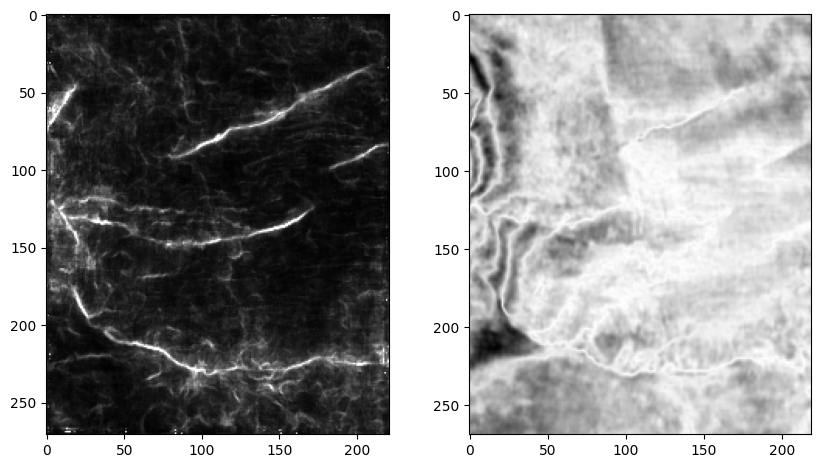

In [32]:
#apply to all signal from the image
#img=np.zeros(geo.shape[0],geo.shape[2])
from scipy.signal import convolve as convolve1d
size = 21
sigma = 1
frequency = 0.1/2

# Generate filters
even_cosine = gaussian_cosine(size, sigma, frequency)
odd_sine = gaussian_sine(size, sigma, frequency)
even_dog, odd_dog = difference_of_gaussians(size, 5, 2)
haar_even, haar_odd = haar_filters(size)

even_spline,odd_spline=spline_filters(size)

even_gabor,odd_gabor=gabor_filters(size, sigma, frequency)

# Filter parameters


# filter_size = 11
# sigma = 10
# even = even_filter(filter_size, sigma)
# odd = odd_filter(filter_size, sigma)
eo=3

if eo==0:
    even=even_cosine
    odd=odd_sine
elif eo==1:
    even=even_dog
    odd=odd_dog
elif eo==2:
    even=haar_even
    odd=haar_odd
elif eo==3:
    even=even_spline
    odd=odd_spline
elif eo==4:
    even=even_gabor
    odd=odd_gabor


vol=[]
vol_peaks=[]
vol_even=[]
vol_odd=[]
for i in range(1,geo.shape[0]-1):
    imgre=[]
    # imgre_peaks=[]
    imgre_even=[]
    imgre_odd=[]
    for j in range(1,geo.shape[1]-1):
        signal=(geo[i,j,:]+geo[i-1,j,:] +geo[i+1,j]+geo[i,j-1]+geo[i,j+1])/5
        # max=np.max(signal)
        # signal_pic=signal.copy()
        signal=gaussian_filter(signal, sigma=2.0)
        even_response = convolve1d(signal, even, mode='same')
        odd_response = convolve1d(signal, odd, mode='same')
        local_energy = np.sqrt(even_response**2 + odd_response**2)
        # peaks, _ = find_peaks(local_energy)
        # signal_pic[peaks]=max
        imgre.append(local_energy)
        imgre_even.append(even_response)
        imgre_odd.append(odd_response)


        # imgre_peaks.append(signal_pic)
        #imgre.append(even_response)
    vol.append(np.array(imgre))
    vol_even.append(np.array(imgre_even))
    vol_odd.append(np.array(imgre_odd))

    # vol_peaks.append(np.array(imgre_peaks))   
vol=np.array(vol)
vol_even=np.array(vol_even)
vol_odd=np.array(vol_odd)
# vol_peaks=np.array(vol_peaks)

plt.figure(figsize=(20,12))
plt.subplot(211)
plt.imshow(-vol[:,:,265],cmap='gray')
plt.subplot(221)
plt.imshow(geo_detect[:,:,265],cmap='gray')
plt.show()


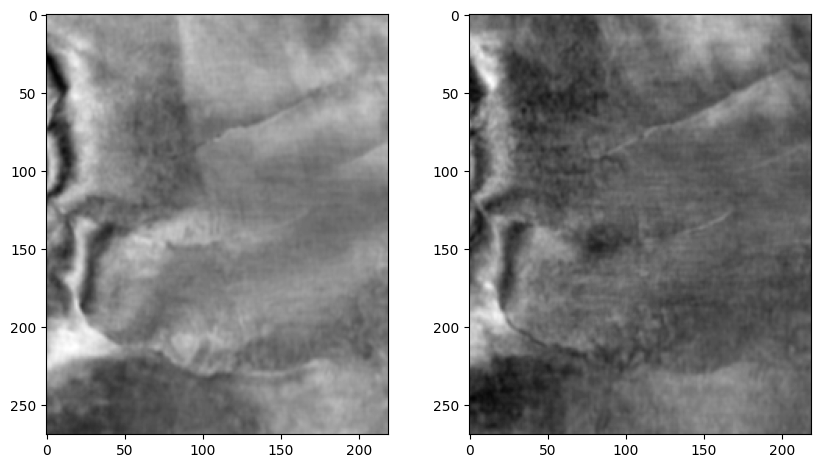

In [33]:
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.imshow(vol_even[:,:,265],cmap='gray')
plt.subplot(221)
plt.imshow(vol_odd[:,:,265],cmap='gray')
plt.show()


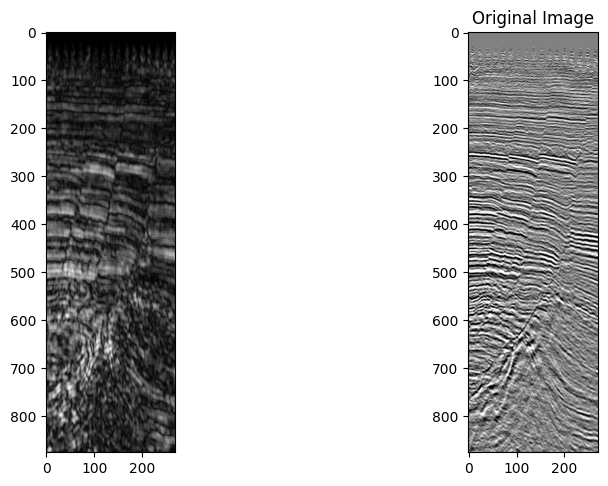

In [27]:
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.imshow(geo[:,100,:].T,cmap='gray')
plt.title('Original Image')
plt.subplot(221)
plt.imshow(vol[:,100,:].T,cmap='gray')
plt.show()

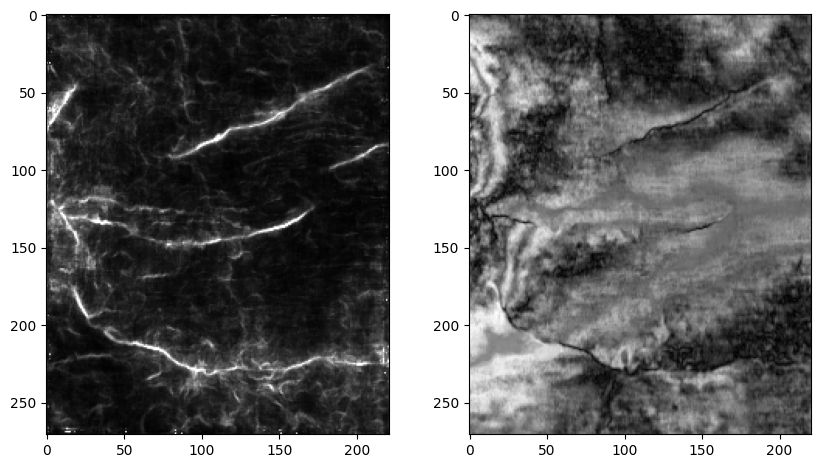

In [243]:
vol=[]
for i in range(geo.shape[0]):
    imgre=[]
    for j in range(geo_smooth.shape[1]):
        signal=geo[i,j,:]
        even_response = convolve1d(signal, even, mode='same')
        odd_response = convolve1d(signal, odd, mode='same')
        local_energy = np.sqrt(even_response**2 + odd_response**2)
        imgre.append(local_energy)
        #imgre.append(even_response)
    vol.append(np.array(imgre))    
vol=np.array(vol)

plt.figure(figsize=(20,12))
plt.subplot(211)
plt.imshow(vol[:,:,265],cmap='gray')
plt.subplot(221)
plt.imshow(geo_detect[:,:,265],cmap='gray')
plt.show()


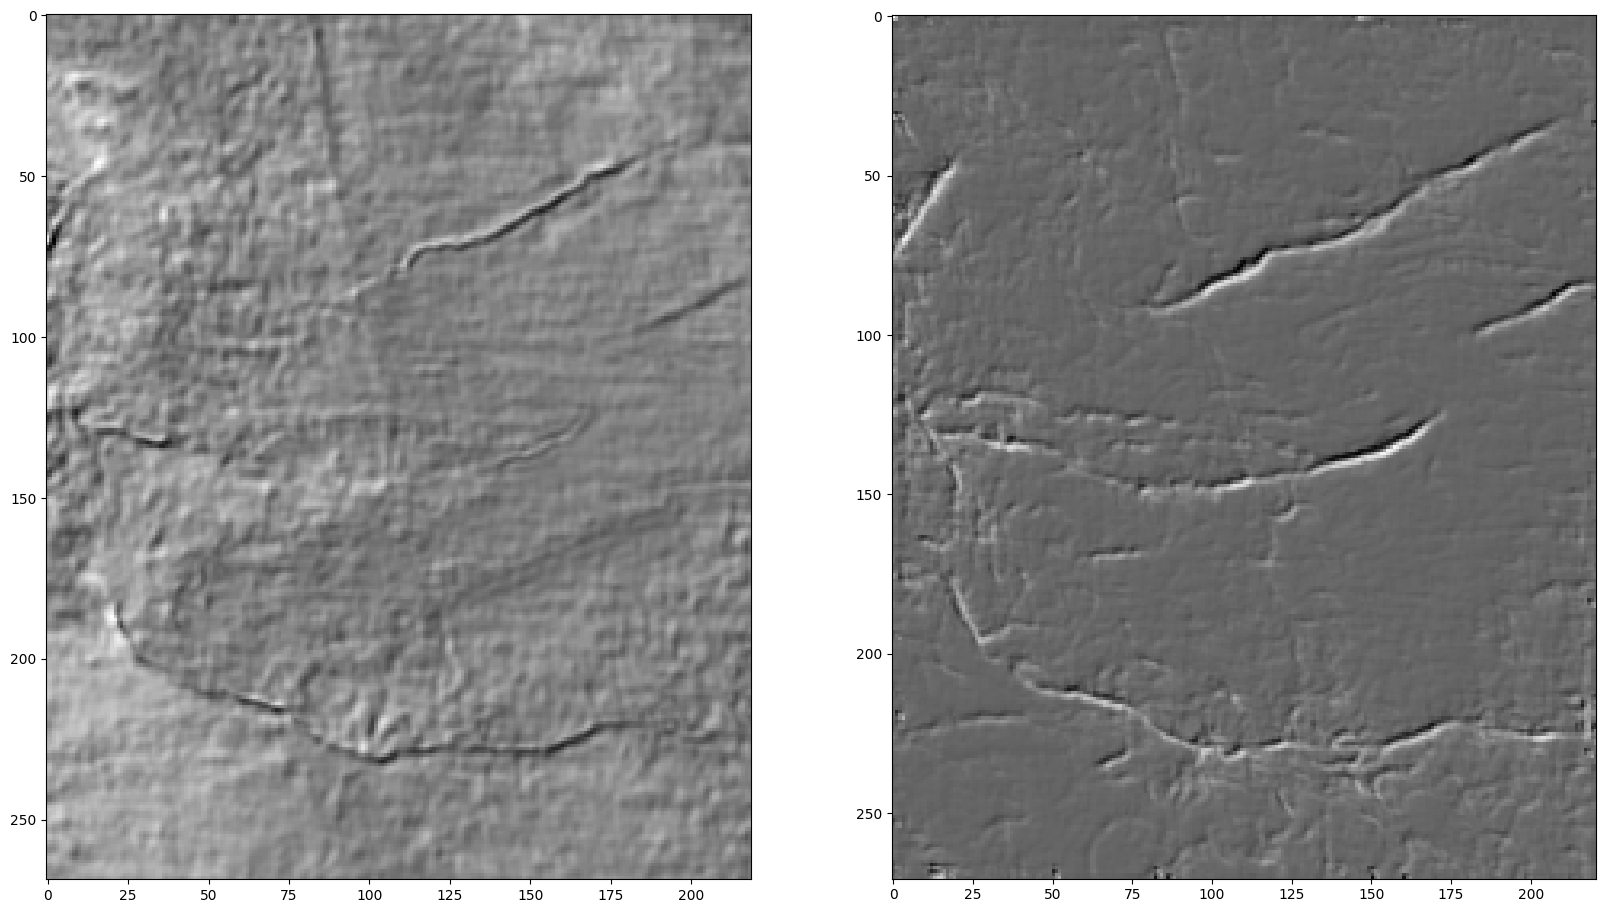

In [28]:
#emboss filter
from scipy.ndimage import convolve
emboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
img_emboss = convolve(vol[:,:,265], emboss, mode='reflect')
img_emboss_detect = convolve(geo_detect[:,:,265], emboss, mode='reflect')

plt.figure(figsize=(20,12))
plt.subplot(121)
plt.imshow(img_emboss,cmap='gray')
plt.subplot(122)
plt.imshow(img_emboss_detect,cmap='gray')
plt.show()



In [190]:
print(geo.max(),geo.min())

25.0 -25.734375


## **Explanation**:
1. **Signal Creation**:
   - The example uses a Gaussian-modulated sine wave, which contains spikes and edges for testing the model.

2. **Quadrature Filters**:
   - Filters are designed with even (cosine) and odd (sine) symmetry, scaled by a Gaussian window to localize their effect.

3. **Local Energy Computation**:
   - The signal is convolved with the two filters, and the local energy is calculated as the square root of the sum of their squared responses.

4. **Feature Detection**:
   - Peaks in the local energy function are identified as feature points.

## **Output**:
The plot shows:
- The original signal.
- Responses of the even- and odd-symmetric filters.
- The local energy and its peaks, highlighting the detected feature points. 

This example can be extended to adapt to specific types of signals or apply the concept to images in 2D. Let me know if you want a 2D implementation!

Below is a Python example of how to calculate **local energy** for a 2D image. This involves applying a quadrature pair of filters (even-symmetric and odd-symmetric) at different orientations to compute the local energy at each pixel.

### **Python Code Example: Local Energy for 2D Images**

```python


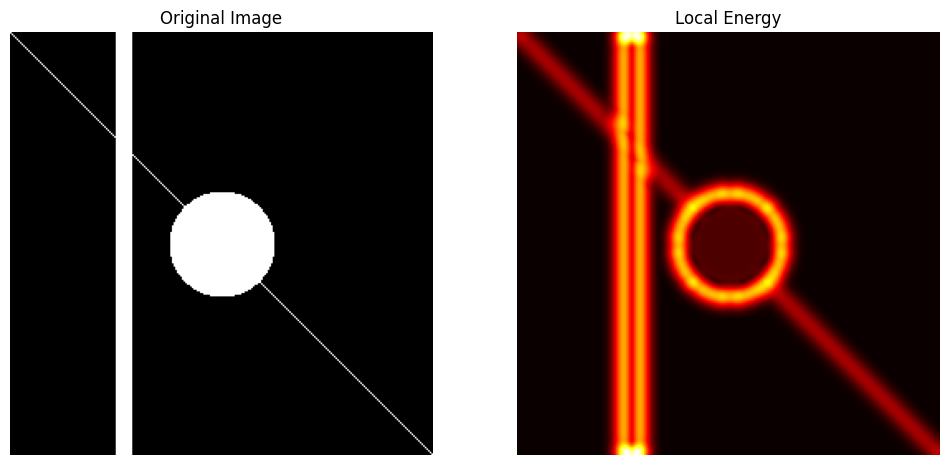

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Create a synthetic 2D image with features (edges, corners, and blobs)
def create_test_image(size=256):
    img = np.zeros((size, size))
    # Add a diagonal edge
    np.fill_diagonal(img, 255)
    # Add a vertical stripe
    img[:, size // 4:size // 4 + 10] = 255
    # Add a circular blob
    y, x = np.ogrid[:size, :size]
    center = (size // 2, size // 2)
    mask = (x - center[0]) ** 2 + (y - center[1]) ** 2 < (size // 8) ** 2
    img[mask] = 255
    return img

image = create_test_image()

# Define quadrature filters (even and odd symmetric) for a given orientation
def gabor_filter2D(size, sigma, frequency, orientation, phase):
    """Generates Gabor filters with a specific orientation."""
    y, x = np.meshgrid(np.linspace(-size // 2, size // 2, size), 
                       np.linspace(-size // 2, size // 2, size))
    x_rot = x * np.cos(orientation) + y * np.sin(orientation)
    y_rot = -x * np.sin(orientation) + y * np.cos(orientation)
    gabor = np.exp(-(x_rot**2 + y_rot**2) / (2 * sigma**2)) * np.cos(2 * np.pi * frequency * x_rot + phase)
    return gabor

# Filter parameters
filter_size = 31
sigma = 5
frequency = 0.1
orientations = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  # 4 orientations

# Apply quadrature filters to compute local energy
local_energy = np.zeros_like(image, dtype=np.float32)

for orientation in orientations:
    # Create even and odd filters
    even_filter = gabor_filter2D(filter_size, sigma, frequency, orientation, phase=0)
    odd_filter = gabor_filter2D(filter_size, sigma, frequency, orientation, phase=np.pi / 2)
    
    # Convolve the image with the filters
    even_response = convolve(image, even_filter, mode='constant')
    odd_response = convolve(image, odd_filter, mode='constant')
    
    # Compute local energy
    local_energy += np.sqrt(even_response**2 + odd_response**2)

# Normalize local energy for visualization
local_energy /= local_energy.max()

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Local Energy")
plt.imshow(local_energy, cmap='hot')
plt.axis('off')

plt.show()


```

### **Explanation**:
1. **Test Image**:
   - A synthetic image is created with edges, corners, and blobs to test the algorithm.

2. **Quadrature Filters**:
   - The code generates Gabor filters as quadrature pairs for even- and odd-symmetric responses.
   - Filters are rotated to detect features across multiple orientations.

3. **Local Energy Calculation**:
   - For each orientation, the image is convolved with the even and odd filters.
   - The local energy is computed as the sum of squared responses from all orientations.

4. **Visualization**:
   - The original image and the computed local energy map are displayed.
   - Bright regions in the local energy map indicate the presence of features (e.g., edges, corners, and blobs).

### **Output**:
- The **original image** will show the synthetic shapes (edges, stripes, and blobs).
- The **local energy map** will highlight high-energy regions, corresponding to features in the image.

This example provides a starting point for applying local energy to feature detection in 2D images. You can adapt it for real-world images and increase the number of orientations for finer detection. Let me know if you'd like to extend it further!